In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Smoothing Images
https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html

### 2D Convolution ( Image Filtering )

 Average Filtering การกรองค่าเฉลี่ย :
- A type of low-pass filter (LPF) used for image smoothing to remove noise from an image while making it smoother.
- เป็นประเภทของตัวกรองผ่านต่ำ (Low-Pass Filter, LPF) ที่ใช้สำหรับการทำให้ภาพเรียบเพื่อลดสัญญาณรบกวน (Noise) ในภาพ และทำให้ภาพดูนุ่มนวลขึ้น
- This is achieved by replacing each pixel value with the local average values.
- การทำงานเกิดขึ้นโดยการแทนค่าพิกเซลแต่ละจุดด้วยค่าเฉลี่ยของบริเวณโดยรอบ

A general convolution function that allows to apply any custom kernel to an image.
เป็นฟังก์ชันคอนโวลูชันทั่วไปที่สามารถใช้เคอร์เนลแบบกำหนดเองใด ๆ กับภาพได้
$$
K = \frac{1}{25}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$


Given Pixel Matrix ในภาษาไทยสามารถแปลได้ว่า:
$$
\begin{bmatrix}
10 & 20 & 30 & 40 & 50 \\
15 & 25 & 35 & 45 & 55 \\
20 & 30 & 40 & 50 & 60 \\
25 & 35 & 45 & 55 & 65 \\
30 & 40 & 50 & 60 & 70
\end{bmatrix}
$$

Total Sum of the pixels ผลรวมทั้งหมดของพิกเซล =825

Calculate the Average คำนวณค่าเฉลี่ย


$$
\text{Average} = \frac{\text{Sum}}{25} = \frac{825}{25} = 33
$$






In [ ]:
!gdown '1DUA26ASO8FjT0lTvmYHcuZjFb88D8x93'

Downloading...
From: https://drive.google.com/uc?id=1DUA26ASO8FjT0lTvmYHcuZjFb88D8x93
To: /content/opencv_logo.png
100% 76.2k/76.2k [00:00<00:00, 29.7MB/s]


In [ ]:
opencv_logo = cv.imread('opencv_logo.png')
assert opencv_logo is not None, "File could not be read. Ensure you uploaded the correct file."

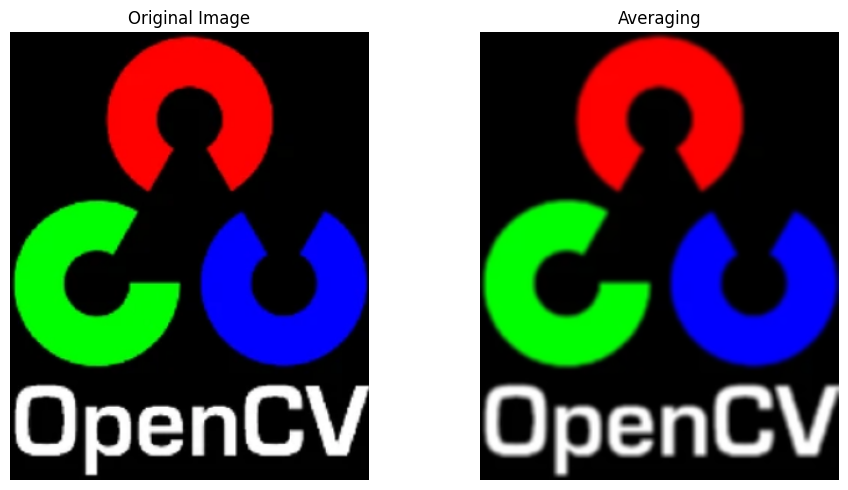

In [ ]:
# Create a kernel for filtering (5x5)
# สร้างเคอร์เนลสำหรับการกรอง (5x5)
kernel = np.ones((5, 5), np.float32) / 25
"""
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
"""

# Apply the convolution filter
# ใช้ตัวกรองคอนโวลูชัน (Convolution)
dst_Conv = cv.filter2D(opencv_logo, -1, kernel)
# -1 indicates that the depth (data type) of the output image will be the same as the input image.
# -1 หมายความว่า ความลึก (data type) ของภาพผลลัพธ์จะเหมือนกับภาพต้นฉบับ
# For example, if the input image is of type np.uint8, the output image will also be np.uint8.
# ตัวอย่างเช่น ถ้าภาพต้นฉบับเป็นชนิด np.uint8 ภาพผลลัพธ์จะเป็น np.uint8 ด้วย

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(opencv_logo, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dst_Conv, cv.COLOR_BGR2RGB))
plt.title('Averaging')
plt.axis('off')

plt.tight_layout()
plt.show()


### Averaging การกรองค่าเฉลี่ย

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element.

การทำงานเกิดขึ้นโดยการคอนโวลภาพด้วยตัวกรองแบบกล่องที่ถูกทำให้เป็นปกติ (Normalized Box Filter)
โดยจะคำนวณค่าเฉลี่ยของพิกเซลทั้งหมดภายในบริเวณเคอร์เนล และแทนค่าพิกเซลตรงกลางด้วยค่าเฉลี่ยนั้น

- cv.filter2D()：

  - You define the kernel explicitly, making it flexible for custom filters.
  - คุณสามารถกำหนดเคอร์เนลได้อย่างชัดเจน ทำให้มีความยืดหยุ่นสำหรับการสร้างตัวกรองแบบกำหนดเอง

- cv.blur()：
  - Simplifies averaging by automatically generating a normalized box kernel of the specified size.
  - ทำให้การกรองค่าเฉลี่ยง่ายขึ้นโดยการสร้างเคอร์เนลแบบกล่องที่ถูกทำให้เป็นปกติ (Normalized Box Kernel) โดยอัตโนมัติตามขนาดที่ระบุไว้


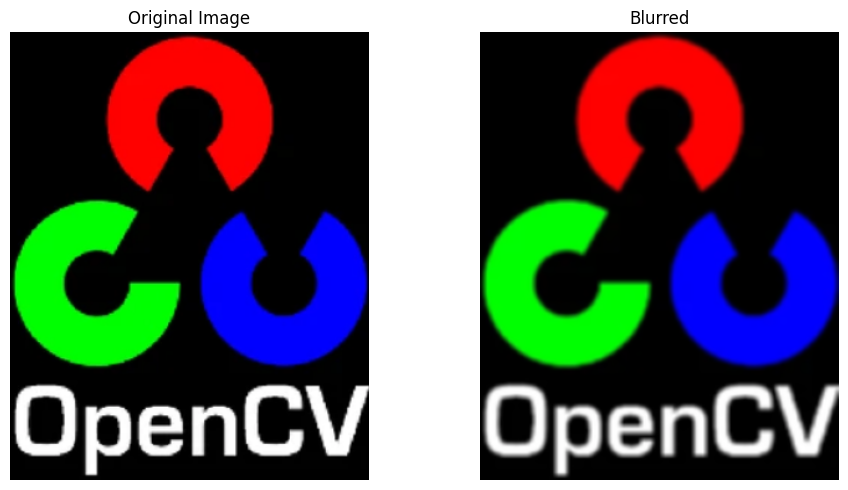

In [ ]:
# Apply averaging blur
# ใช้การกรองค่าเฉลี่ยแบบเบลอ
blur = cv.blur(opencv_logo, (5, 5))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(opencv_logo, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))
plt.title('Blurred')
plt.axis('off')

plt.tight_layout()
plt.show()



### 2. Gaussian Blurring การเบลอแบบ Gaussian
A linear smoothing method that reduces noise and detail in an image by applying a Gaussian kernel. The kernel assigns higher weights to pixels closer to the center, with weights decreasing as the distance from the center increases.

วิธีการทำให้ภาพเรียบแบบเชิงเส้น (Linear Smoothing) ที่ลดสัญญาณรบกวน (Noise) และรายละเอียดในภาพโดยใช้เคอร์เนลแบบ Gaussian ซึ่งเคอร์เนลจะให้ค่าถ่วงน้ำหนัก (Weights) สูงขึ้นสำหรับพิกเซลที่อยู่ใกล้จุดศูนย์กลาง และค่าถ่วงน้ำหนักจะลดลงตามระยะห่างจากจุดศูนย์กลางที่เพิ่มขึ้น

blur = cv.GaussianBlur(src, ksize, sigmaX[, sigmaY])
- src ： input image ภาพต้นฉบับที่ต้องการทำการเบลอ
- ksize : kernel size (should be positive and odd) ขนาดของเคอร์เนล (ต้องเป็นค่าบวกและเป็นเลขคี่)
- sigmaX[, sigmaY] : standard deviation for x and y directions, Y is defaultly zero. ค่าเบี่ยงเบนมาตรฐาน (Standard Deviation) ในทิศทาง x และ y โดยค่า Y จะถูกตั้งค่าเป็นศูนย์ (0) โดยอัตโนมัติหากไม่ได้ระบุ

$$
\begin{bmatrix}
40 & 107 & 5 \\
198 & 226 & 223 \\
37 & 68 & 193
\end{bmatrix}
$$

Gaussian Weight Matrix Formula:

$$
G(x, y) = \frac{1}{2\pi\sigma^2} \cdot \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
$$

- x,y: Horizontal and vertical distances of a pixel relative to the center point.

- σ: Standard deviation, controlling the spread of the distribution.



Relative Coordinates Matrix 3*3:

$$
\begin{bmatrix}
(-1, -1) & (-1, 0) & (-1, 1) \\
(0, -1) & (0, 0) & (0, 1) \\
(1, -1) & (1, 0) & (1, 1)
\end{bmatrix}
$$


Relative Coordinates Matrix 5*5:

$$
\begin{bmatrix}
(-2, -2) & (-2, -1) & (-2, 0) & (-2, 1) & (-2, 2) \\
(-1, -2) & (-1, -1) & (-1, 0) & (-1, 1) & (-1, 2) \\
(0, -2) & (0, -1) & (0, 0) & (0, 1) & (0, 2) \\
(1, -2) & (1, -1) & (1, 0) & (1, 1) & (1, 2) \\
(2, -2) & (2, -1) & (2, 0) & (2, 1) & (2, 2)
\end{bmatrix}
$$


If a 3×3 neighborhood around the center pixel 226 ถ้าเรามีพื้นที่เพื่อนบ้านขนาด 3×3 รอบพิกเซลศูนย์กลาง 226：
$$
\begin{bmatrix}
40 & 107 & 5 \\
198 & 226 & 223 \\
37 & 68 & 193
\end{bmatrix}
$$

And if Gaussian Kernel Weights และหากเราใช้:
$$
\begin{bmatrix}
0.05 & 0.1 & 0.05 \\
0.1 & 0.4 & 0.1 \\
0.05 & 0.1 & 0.05
\end{bmatrix}
$$


Step 1: Element-wise Multiplication การคูณแบบองค์ประกอบต่อองค์ประกอบ
$$
\begin{bmatrix}
2.0 & 10.7 & 0.25 \\
19.8 & 90.4 & 22.3 \\
1.85 & 6.8 & 9.65
\end{bmatrix}
$$


Step 2: Summing Up การหาผลรวม

2.0+10.7+0.25+19.8+90.4+22.3+1.85+6.8+9.65=163.75 =164


$$
\begin{bmatrix}
40 & 107 & 5 \\
198 & 164 & 223 \\
37 & 68 & 193
\end{bmatrix}
$$


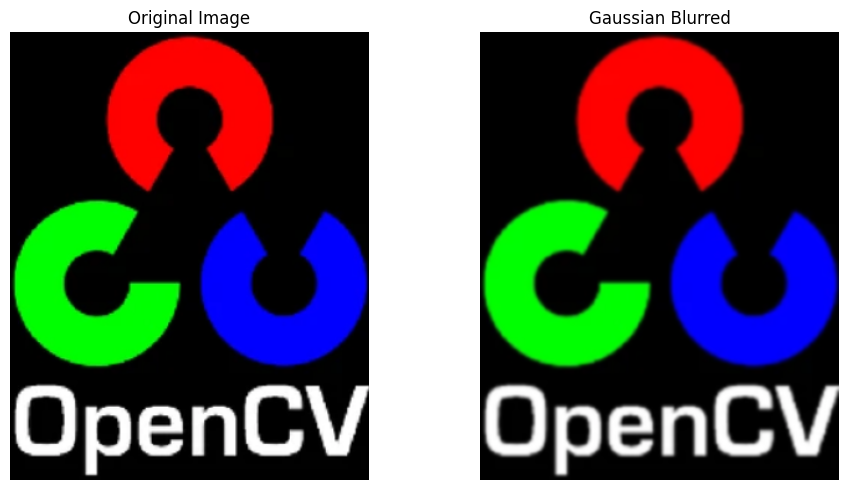

In [ ]:
# Apply Gaussian blur
# ใช้ Gaussian Blur เพื่อทำให้ภาพเรียบ
Gblur = cv.GaussianBlur(opencv_logo,(5,5),0) # sigma is set to 0, so calculates the standard deviation automatically based on kernel size
# sigma ถูกตั้งค่าเป็น 0 ซึ่งหมายความว่า OpenCV จะคำนวณค่าเบี่ยงเบนมาตรฐาน (Standard Deviation) อัตโนมัติตามขนาดของเคอร์เนล

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(opencv_logo, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(Gblur, cv.COLOR_BGR2RGB))
plt.title("Gaussian Blurred")
plt.axis('off')

plt.tight_layout()
plt.show()

### 3. Median Blurring การเบลอแบบค่ามัธยฐาน
The basic idea is to replace the pixel value with the median value of its neighborhood or surrounding grayscale values.

แนวคิดพื้นฐานคือการแทนค่าพิกเซลด้วยค่ามัธยฐานของค่าพิกเซลในบริเวณเพื่อนบ้านหรือค่ารอบๆ ในภาพระดับเทาค่าหนึ่งๆ

If given input ให้ข้อมูลอินพุต:

$$
\begin{bmatrix}
10 & 20 & 30 \\
15 & 200 & 35 \\
25 & 30 & 40
\end{bmatrix}
$$

Step 1: Place all pixel values into an array

ขั้นตอนที่ 1: นำค่าพิกเซลทั้งหมดในพื้นที่เพื่อนบ้านใส่ลงในอาร์เรย์

- {10, 20, 30, 15, 200, 35, 25, 30, 40}

Step 2: Sort the array and take the median value

ขั้นตอนที่ 2: จัดเรียงอาร์เรย์ตามลำดับจากน้อยไปมาก และเลือกค่ามัธยฐาน

- {10, 15, 20, 25, 30, 30, 35, 40, 200}

- Median=30

$$
\begin{bmatrix}
10 & 20 & 30 \\
15 & 30 & 35 \\
25 & 30 & 40
\end{bmatrix}
$$

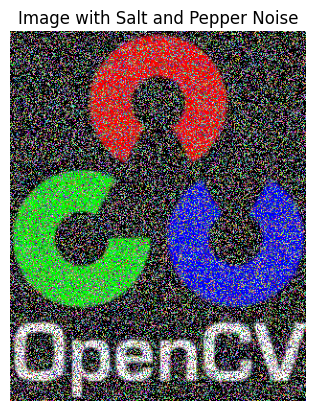

In [ ]:
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy_image = image.copy()
    # get image size
    # # รับขนาดของภาพ (จำนวนพิกเซลทั้งหมด)
    total_pixels = image.size // image.shape[2]

    # calculate the number of noises
    # คำนวณจำนวนจุดรบกวนประเภท "เกลือ" และ "พริกไทย"
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    # Add salt noises
    # เพิ่มจุดรบกวนประเภท "เกลือ" (Salt noise)
    for _ in range(num_salt):
        x, y = np.random.randint(0, image.shape[1]), np.random.randint(0, image.shape[0])
        noisy_image[y, x] = np.random.randint(0, 256, 3)  # Random value per channel

    # Add pepper noises
    # เพิ่มจุดรบกวนประเภท "พริกไทย" (Pepper noise)
    for _ in range(num_pepper):
        x, y = np.random.randint(0, image.shape[1]), np.random.randint(0, image.shape[0])
        noisy_image[y, x] = np.random.randint(0, 256, 3)

    return noisy_image

# Add salt-and-pepper noises to the image
# เพิ่มจุดรบกวนประเภทเกลือและพริกไทยให้กับภาพ
salt_and_pepper_noisy_img = add_salt_and_pepper_noise(opencv_logo, salt_prob=0.3, pepper_prob=0.3)

plt.imshow(cv.cvtColor(salt_and_pepper_noisy_img, cv.COLOR_BGR2RGB))
plt.title("Image with Salt and Pepper Noise")
plt.axis('off')
plt.show()

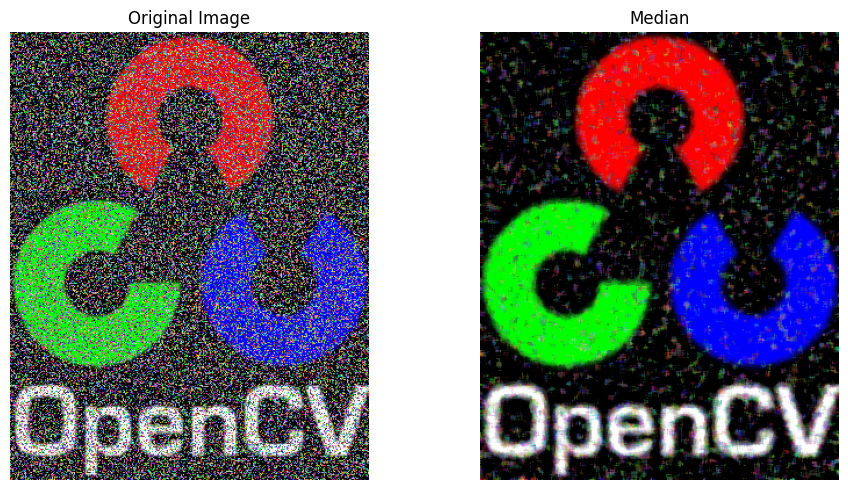

In [ ]:
# Apply Median Blur
# ใช้ Median Blur เพื่อลดจุดรบกวน

# median = cv.medianBlur(input, kernel)
median = cv.medianBlur(salt_and_pepper_noisy_img,5)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(salt_and_pepper_noisy_img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(median, cv.COLOR_BGR2RGB))
plt.title("Median")
plt.axis('off')

plt.tight_layout()
plt.show()

### 4. Bilateral Filtering การกรองแบบ
- A type of non-linear filtering technique based on Gaussian filtering.
- เป็นเทคนิคการกรองแบบไม่เชิงเส้น (Non-linear Filtering) ที่พัฒนามาจาก Gaussian Filtering
- Its goal is to address the edge blurring caused by Gaussian filtering. It reduces noise while preserving fine details and edges effectively.
- เป้าหมายคือเพื่อแก้ปัญหาขอบภาพที่เบลอจาก Gaussian Filtering โดยลดสัญญาณรบกวน (Noise) ขณะยังคงรักษารายละเอียดและขอบภาพได้อย่างมีประสิทธิภาพ
- Bilateral Filtering uses two Gaussian filters :
  - Spatial Gaussian: Ensures only nearby pixels are considered for blurring.
  - Intensity Gaussian: Ensures only pixels with similar intensity values (brightness or color) to the center pixel are considered for blurring.

- Bilateral Filtering ใช้ Gaussian Filters สองประเภท:
  - Spatial Gaussian: ทำให้เฉพาะพิกเซลที่อยู่ใกล้เคียงเท่านั้นที่ถูกนำมาพิจารณาในการเบลอ
  - Intensity Gaussian: ทำให้เฉพาะพิกเซลที่มีค่าความเข้ม (Brightness หรือ Color) ใกล้เคียงกับพิกเซลศูนย์กลางเท่านั้นที่ถูกนำมาพิจารณาในการเบลอ







In [ ]:
!gdown '1XIRgBYwbnC9hS8R8D1rDy1cBaD-ih1Lk'

Downloading...
From: https://drive.google.com/uc?id=1XIRgBYwbnC9hS8R8D1rDy1cBaD-ih1Lk
To: /content/ORIGINAL.png
100% 266k/266k [00:00<00:00, 4.48MB/s]


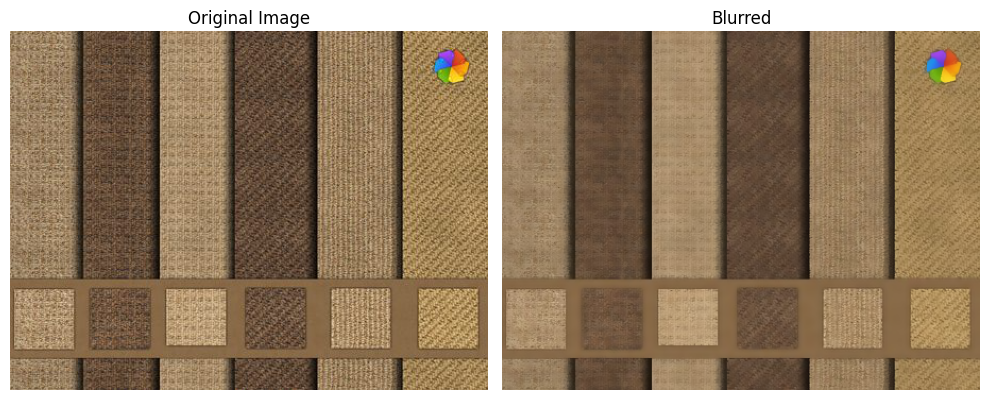

In [ ]:
O_img = cv.imread('ORIGINAL.png')
assert O_img is not None, "file could not be read, check with os.path.exists()"

# blur = cv.bilateralFilter(input, d, sigmaColor, sigmaSpace)
Bilateral_blur = cv.bilateralFilter(O_img,9,75,75)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(O_img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(Bilateral_blur, cv.COLOR_BGR2RGB))
plt.title("Blurred")
plt.axis('off')

plt.tight_layout()
plt.show()